In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<h3> Data Loading & Analysis </h3>

In [2]:
df = pd.read_csv("heart.csv")

# The shape of the data
print("The shape of the dataset is : ", df.shape)

# Preview of the first 5 rows of the data
df.head()

The shape of the dataset is :  (303, 14)


age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [3]:
# Checking the number of unique values in each column

dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

unique count
age                 41
sex                  2
cp                   4
trtbps              49
chol               152
fbs                  2
restecg              3
thalachh            91
exng                 2
oldpeak             40
slp                  3
caa                  5
thall                4
output               2

In [4]:
# Separating the columns in categorical and continuous

cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [5]:
# Summary statistics

df[con_cols].describe().transpose()

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
trtbps    303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
thalachh  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2

In [6]:
# Missing values

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<h3>Exploratory Data Analysis</h3>

In [13]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

In [14]:
# Scaling and Encoding features

# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


age  trtbps      chol  thalachh  oldpeak  sex_1  exng_1  caa_1  caa_2  \
0  0.592593    0.75 -0.110236 -0.092308   0.9375      1       0      0      0   
1 -1.333333    0.00  0.157480  1.046154   1.6875      1       0      0      0   
2 -1.037037    0.00 -0.566929  0.584615   0.3750      0       0      0      0   
3  0.074074   -0.50 -0.062992  0.769231   0.0000      1       0      0      0   
4  0.148148   -0.50  1.795276  0.307692  -0.1250      0       1      0      0   

   caa_3  ...  cp_2  cp_3  fbs_1  restecg_1  restecg_2  slp_1  slp_2  thall_1  \
0      0  ...     0     1      1          0          0      0      0        1   
1      0  ...     1     0      0          1          0      0      0        0   
2      0  ...     0     0      0          0          0      0      1        0   
3      0  ...     0     0      0          1          0      0      1        0   
4      0  ...     0     0      0          1          0      0      1        0   

   thall_2  thall_3  
0        0        0  
1        1        0  
2        1        0  
3        1        0  
4        1        0  

[5 rows x 22 columns]

In [15]:
# Dimensionality Reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=22)
X = pca.fit_transform(X)

In [16]:
# Train and test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is: ", X_train.shape)
print("The shape of X_test is: ",X_test.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of X_train is:  (242, 22)
The shape of X_test is:  (61, 22)
The shape of y_train is:  (242, 1)
The shape of y_test is:  (61, 1)


## Classification - Linear & Tree Classifiers

<h4>Support Vector Machines</h4>

In [17]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, digits=4))

The test accuracy score of SVM is  0.8688524590163934
Classification Report: 
               precision    recall  f1-score   support

           0     0.8387    0.8966    0.8667        29
           1     0.9000    0.8438    0.8710        32

    accuracy                         0.8689        61
   macro avg     0.8694    0.8702    0.8688        61
weighted avg     0.8709    0.8689    0.8689        61



<h4>Logistic Regression - From Scratch</h4>

Iter 0: cost: 0.9630790900890902
Iter 10000: cost: 0.3520790809255197
Iter 20000: cost: 0.32434715031270844
Iter 30000: cost: 0.3118760781960616
Iter 40000: cost: 0.3047201733044162
Iter 50000: cost: 0.3002186873198842
Iter 60000: cost: 0.29722314401132116
Iter 70000: cost: 0.29514351802240185
Iter 80000: cost: 0.2936488361564284
Iter 90000: cost: 0.29254233444797684


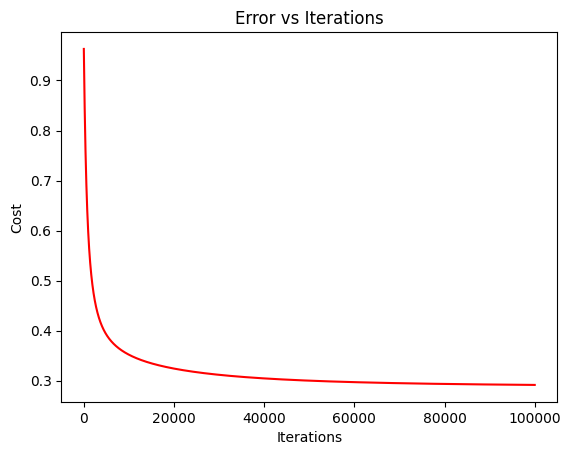

The test accuracy score of Logistric Regression is  0.9016393442622951
Classification Report: 
               precision    recall  f1-score   support

           0     0.8966    0.8966    0.8966        29
           1     0.9062    0.9062    0.9062        32

    accuracy                         0.9016        61
   macro avg     0.9014    0.9014    0.9014        61
weighted avg     0.9016    0.9016    0.9016        61



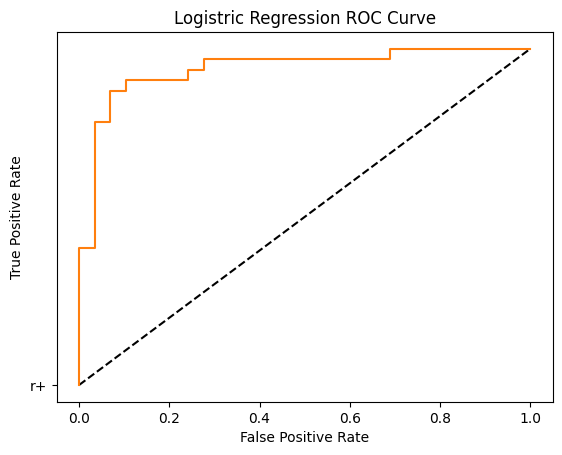

In [19]:
# define logistic regression impl method

class LogisticRegression:

    def __init__(self, alpha=0.01, iters=1000, verbose = False):
        self.alpha = alpha
        self.iters = iters
        self.theta = None
        self.verbose = verbose
        
    # Logistic Function
    def sigmoid(self, z):
        return  1 / (1 + np.exp(-z))
    
    # Cost Function
    def cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    #Gradient Computation
    def gradient(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]
    
    # Parameter Update
    def update_theta(self, gradient, lr):
        return self.theta - (gradient * self.alpha)

    def fit(self, X, y):
        # Initial theta values
        np.random.seed(999)
        self.theta = np.random.randn(X.shape[1])
        cost_array = np.zeros(self.iters)
        
        for i in range(self.iters):
            h = self.sigmoid(np.dot(X, self.theta))
            cost_num = self.cost(h, y)
            cost_array[i] = cost_num
            gradient = self.gradient(X, h, y)
            self.theta = self.update_theta(gradient, self.alpha)

            # Print training History
            if(self.verbose):
                if(self.iters<=1000):
                    if(i%100==0):
                        print(f"Iter {i}: cost: {cost_array[i]}")
                elif(self.iters<=10000 and self.iters>1000):
                    if(i%1000==0):
                        print(f"Iter {i}: cost: {cost_array[i]}")
                else:
                    if(i%10000==0):
                        print(f"Iter {i}: cost: {cost_array[i]}")
        
        return cost_array
    
    def predict(self, X):
        h = self.sigmoid(np.dot(X, self.theta))
        preds = np.where(h>=0.5, 1, 0)
        return np.array(preds)
    
    def predict_proba(self, X):
        h = self.sigmoid(np.dot(X, self.theta))
        return np.array(h)

    def plotChart(self, cost_num):
        fig, ax = plt.subplots()
        ax.plot(np.arange(self.iters), cost_num, 'r')
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Cost')
        ax.set_title('Error vs Iterations')
        plt.show()

# hyper params
lr = 0.005
iters = 100000

log_reg = LogisticRegression(lr, iters, True)
costs = log_reg.fit(X_train, y_train.values.reshape(242,))
log_reg.plotChart(costs)
y_pred = log_reg.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, digits=4))

# calculating the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()